# Student Logins Dataset

Each session has a start and end time. <br>
Students have multiple sessions and sometimes take different classes.<br>
Account created date is an indicator of how long that student has been participating in the online class.<br>

Questions<br>
Predict the duration time, calculated using the start and end times.<br>
Explain how and why you selected the features for your model.<br>
Create a measurement of how well the model performs.<br>

Set my target (y)<br>
- Duration
<br>

Select my features (X):
- Session_start_time, Session_end_time:
    - Day of week
    - Day of month
    - Month in year
    - Time of day - starttime and endtime
    - Year
- Class_id
- Problems_completed
- Student_id
- Student_account_created:
    - Month in year
    - Year
- Student_previous_logins_total
- Student_previous_class_logins

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime
import sklearn

import statsmodels.formula.api as smf   # for "formula notation"

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%y %H:%M')

logins = pd.read_csv('../ds-la-09/hw/hw3d-logins/student_logins.csv', \
                     parse_dates=['session_start_time', 'session_end_time', 'student_account_created'], \
                     date_parser=dateparse)
logins.head()

,session_start_time,session_end_time,class_id,problems_completed,student_id,student_account_created,student_previous_logins_total,student_previous_class_logins
0,2012-01-06 16:28:00,2012-01-06 16:55:00,e,37,91,2011-10-26,76,27
1,2012-01-07 11:00:00,2012-01-07 11:27:00,e,24,161,2012-01-06,2,0
2,2012-01-08 09:04:00,2012-01-08 09:31:00,e,50,141,2011-12-31,8,5
3,2012-01-09 12:41:00,2012-01-09 12:48:00,e,26,101,2011-11-16,199,104
4,2012-01-09 16:59:00,2012-01-09 17:43:00,m,37,103,2011-11-23,100,41


In [3]:
logins.dtypes

session_start_time               datetime64[ns]
session_end_time                 datetime64[ns]
class_id                                 object
problems_completed                        int64
student_id                                int64
student_account_created          datetime64[ns]
student_previous_logins_total             int64
student_previous_class_logins             int64
dtype: object

In [4]:
logins['class_id'].unique()

array(['e', 'm', 'a', 'g', 'c'], dtype=object)

In [5]:
logins['duration'] = (logins['session_end_time'] - logins['session_start_time'])
logins['duration'] = [i.seconds for i in logins['duration']]
logins['dayofweek'] = [i.dayofweek for i in logins['session_start_time']]
logins['dayofmonth'] = [i.day for i in logins['session_start_time']]
logins['month'] = [i.month for i in logins['session_start_time']]
logins['starttimeofday'] = [i.hour for i in logins['session_start_time']]
logins['endtimeofday'] = [i.hour for i in logins['session_end_time']]
logins['year'] = [i.year for i in logins['session_start_time']]

In [6]:
logins.head()

,session_start_time,session_end_time,class_id,problems_completed,student_id,student_account_created,student_previous_logins_total,student_previous_class_logins,duration,dayofweek,dayofmonth,month,starttimeofday,endtimeofday,year
0,2012-01-06 16:28:00,2012-01-06 16:55:00,e,37,91,2011-10-26,76,27,1620,4,6,1,16,16,2012
1,2012-01-07 11:00:00,2012-01-07 11:27:00,e,24,161,2012-01-06,2,0,1620,5,7,1,11,11,2012
2,2012-01-08 09:04:00,2012-01-08 09:31:00,e,50,141,2011-12-31,8,5,1620,6,8,1,9,9,2012
3,2012-01-09 12:41:00,2012-01-09 12:48:00,e,26,101,2011-11-16,199,104,420,0,9,1,12,12,2012
4,2012-01-09 16:59:00,2012-01-09 17:43:00,m,37,103,2011-11-23,100,41,2640,0,9,1,16,17,2012


In [7]:
ci = pd.get_dummies(logins['class_id'])
logins = logins.merge(ci, suffixes=('', ''),
                            left_index=True, right_index=True)

In [8]:
logins.head()

,session_start_time,session_end_time,class_id,problems_completed,student_id,student_account_created,student_previous_logins_total,student_previous_class_logins,duration,dayofweek,dayofmonth,month,starttimeofday,endtimeofday,year,a,c,e,g,m
0,2012-01-06 16:28:00,2012-01-06 16:55:00,e,37,91,2011-10-26,76,27,1620,4,6,1,16,16,2012,0,0,1,0,0
1,2012-01-07 11:00:00,2012-01-07 11:27:00,e,24,161,2012-01-06,2,0,1620,5,7,1,11,11,2012,0,0,1,0,0
2,2012-01-08 09:04:00,2012-01-08 09:31:00,e,50,141,2011-12-31,8,5,1620,6,8,1,9,9,2012,0,0,1,0,0
3,2012-01-09 12:41:00,2012-01-09 12:48:00,e,26,101,2011-11-16,199,104,420,0,9,1,12,12,2012,0,0,1,0,0
4,2012-01-09 16:59:00,2012-01-09 17:43:00,m,37,103,2011-11-23,100,41,2640,0,9,1,16,17,2012,0,0,0,0,1


In [9]:
logins['accountcreatedmonth'] = [i.month for i in logins['student_account_created']]
logins['accountcreatedyear'] = [i.year for i in logins['student_account_created']]
logins.dtypes

session_start_time               datetime64[ns]
session_end_time                 datetime64[ns]
class_id                                 object
problems_completed                        int64
student_id                                int64
student_account_created          datetime64[ns]
student_previous_logins_total             int64
student_previous_class_logins             int64
duration                                  int64
dayofweek                                 int64
dayofmonth                                int64
month                                     int64
starttimeofday                            int64
endtimeofday                              int64
year                                      int64
a                                       float64
c                                       float64
e                                       float64
g                                       float64
m                                       float64
accountcreatedmonth                     

In [10]:
logins.drop(labels=['class_id'], axis=1, inplace=True)
logins.head()

,session_start_time,session_end_time,problems_completed,student_id,student_account_created,student_previous_logins_total,student_previous_class_logins,duration,dayofweek,dayofmonth,...,starttimeofday,endtimeofday,year,a,c,e,g,m,accountcreatedmonth,accountcreatedyear
0,2012-01-06 16:28:00,2012-01-06 16:55:00,37,91,2011-10-26,76,27,1620,4,6,...,16,16,2012,0,0,1,0,0,10,2011
1,2012-01-07 11:00:00,2012-01-07 11:27:00,24,161,2012-01-06,2,0,1620,5,7,...,11,11,2012,0,0,1,0,0,1,2012
2,2012-01-08 09:04:00,2012-01-08 09:31:00,50,141,2011-12-31,8,5,1620,6,8,...,9,9,2012,0,0,1,0,0,12,2011
3,2012-01-09 12:41:00,2012-01-09 12:48:00,26,101,2011-11-16,199,104,420,0,9,...,12,12,2012,0,0,1,0,0,11,2011
4,2012-01-09 16:59:00,2012-01-09 17:43:00,37,103,2011-11-23,100,41,2640,0,9,...,16,17,2012,0,0,0,0,1,11,2011


Visualizations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11771c7f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117908550>]], dtype=object)

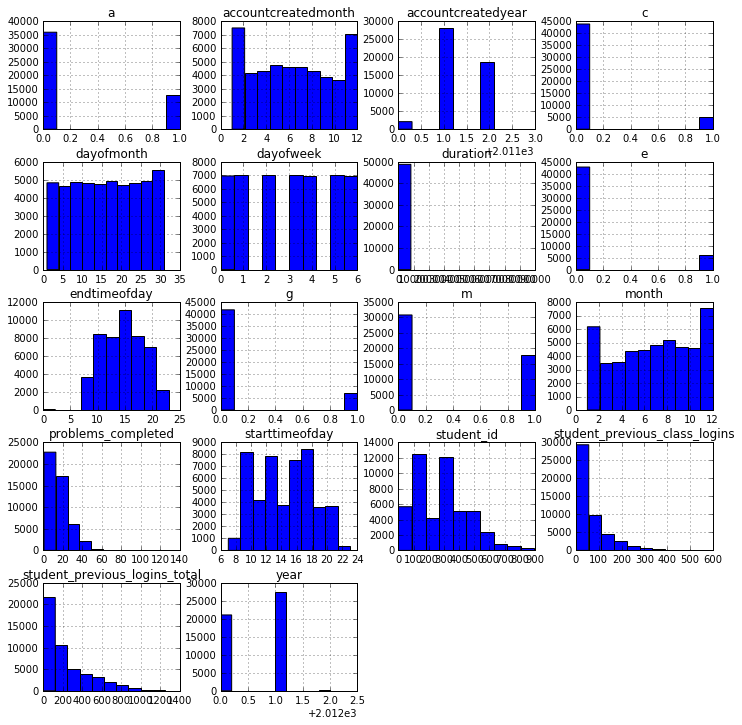

In [11]:
logins.hist(figsize=(12, 12))

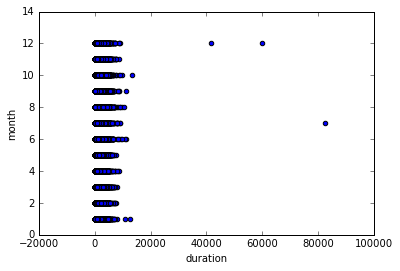

In [12]:
logins.plot(kind='scatter', x='duration', y='month')

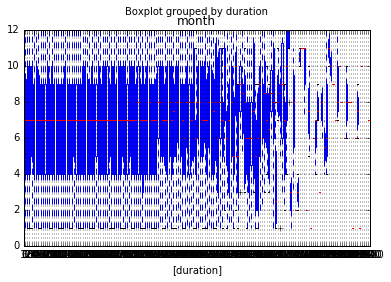

In [13]:
m = logins[['duration', 'month']]
m.boxplot(by='duration')

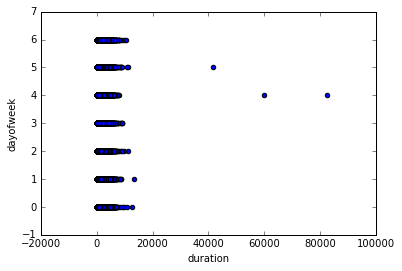

In [14]:
logins.plot(kind='scatter', x='duration', y='dayofweek')

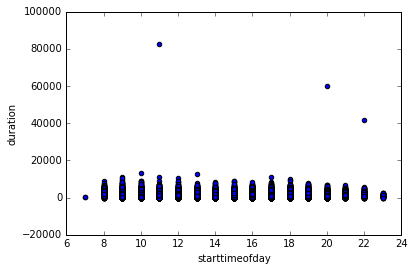

In [15]:
logins.plot(kind='scatter', y='duration', x='starttimeofday')

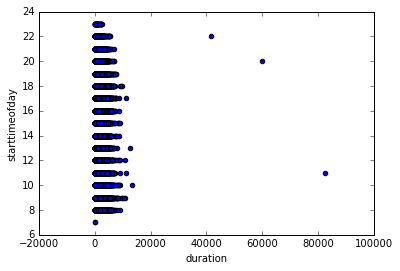

In [16]:
logins.plot(kind='scatter', x='duration', y='starttimeofday')

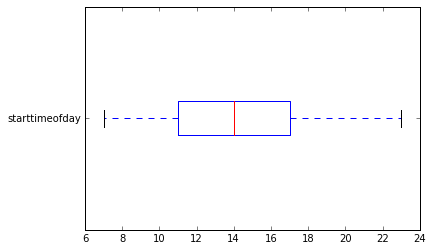

In [17]:
logins.plot(kind='box', x='duration', y='starttimeofday', vert=False)

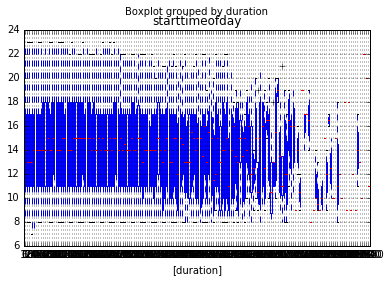

In [18]:
c = logins[['duration', 'starttimeofday']]
c.boxplot(by='duration')

/Users/soleiladler/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/soleiladler/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


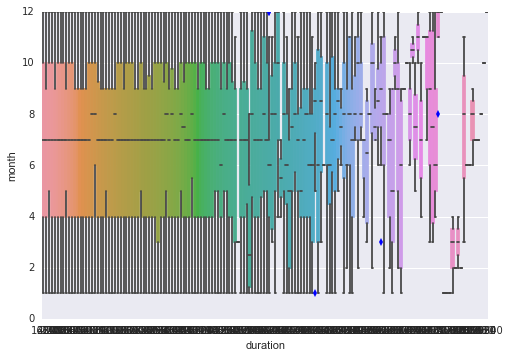

In [19]:
import seaborn as sns
sns.boxplot(x='duration', y='month', data=logins)
sns.plt.show()

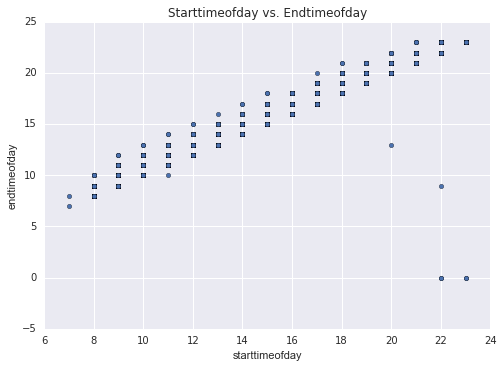

In [20]:
logins.plot(kind='scatter', x='starttimeofday', y='endtimeofday')
plt.title("Starttimeofday vs. Endtimeofday")

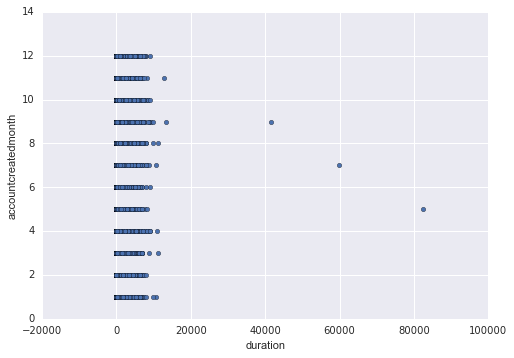

In [21]:
logins.plot(kind='scatter', x='duration', y='accountcreatedmonth')

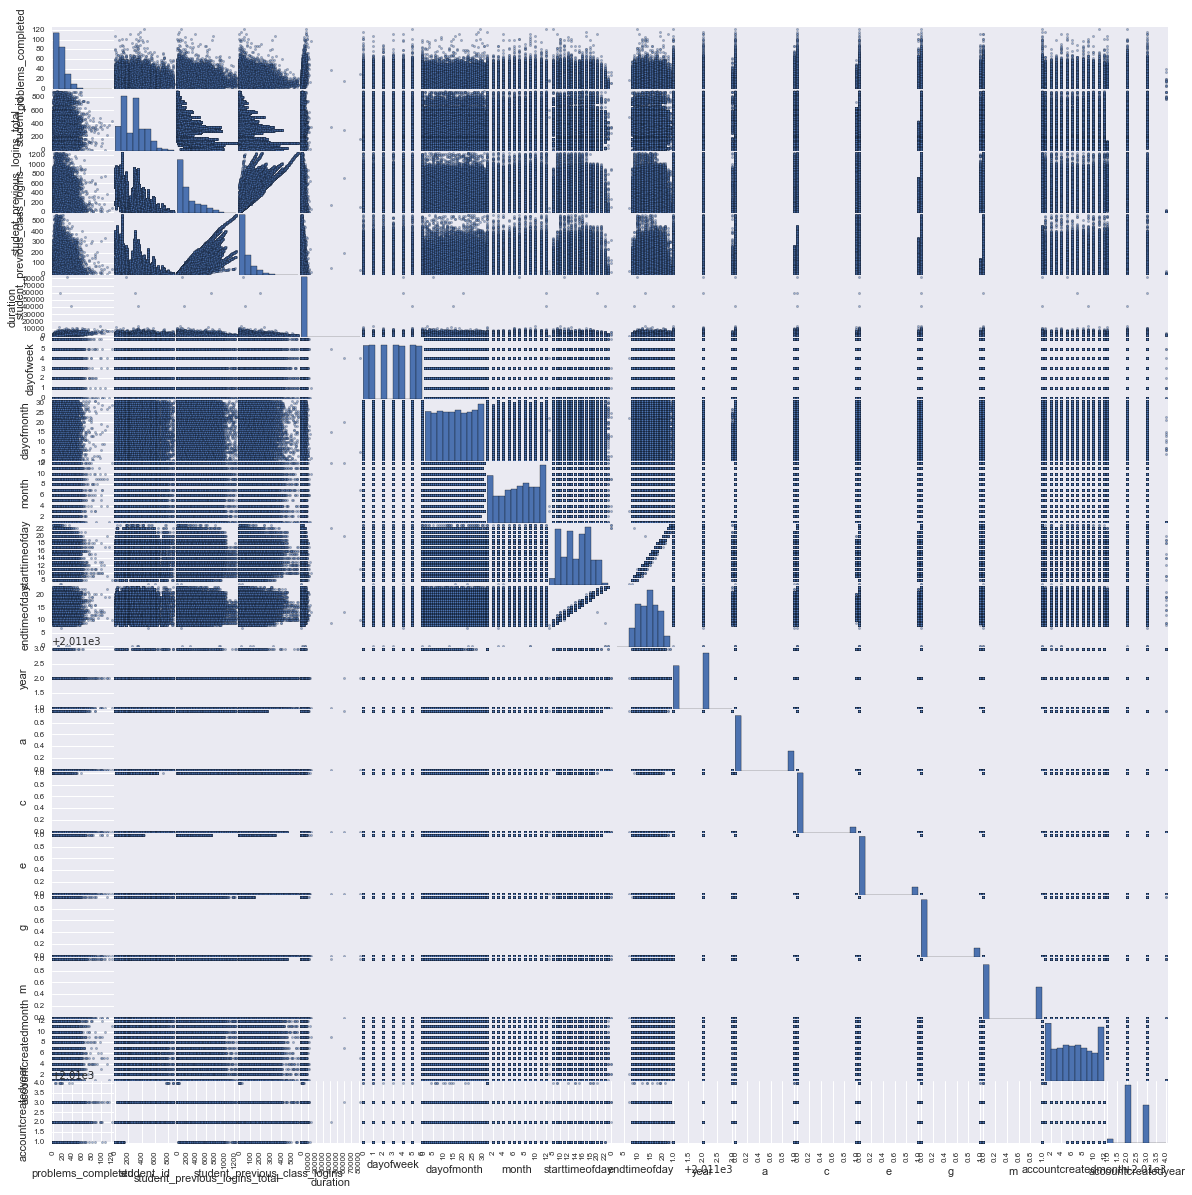

In [22]:
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(logins, figsize = (20, 20))

In [23]:
list(logins)

['session_start_time',
 'session_end_time',
 'problems_completed',
 'student_id',
 'student_account_created',
 'student_previous_logins_total',
 'student_previous_class_logins',
 'duration',
 'dayofweek',
 'dayofmonth',
 'month',
 'starttimeofday',
 'endtimeofday',
 'year',
 'a',
 'c',
 'e',
 'g',
 'm',
 'accountcreatedmonth',
 'accountcreatedyear']

In [24]:
logins['dayofweek'].unique()

array([4, 5, 6, 0, 1, 2, 3])

In [25]:
dow = pd.get_dummies(logins['dayofweek'])
logins = logins.merge(dow, suffixes=('', ''),
                            left_index=True, right_index=True)

In [26]:
logins.rename(columns={0: 'dow_0', 1: 'dow_1', 2: 'dow_2', 3: 'dow_3', 4: 'dow_4', 5: 'dow_5', 6: 'dow_6'}, inplace=True)

In [27]:
dom = pd.get_dummies(logins['dayofmonth'])
logins = logins.merge(dom, suffixes=('', ''),
                            left_index=True, right_index=True)

In [28]:
logins.rename(columns={1: 'dom_1', 2: 'dom_2', 3: 'dom_3', 4: 'dom_4', 5: 'dom_5', 6: 'dom_6', 7: 'dom_7', 8: 'dom_8', 9: 'dom_9', 10: 'dom_10', 11: 'dom_11', 12: 'dom_12', 13: 'dom_13', 14: 'dom_14', 15: 'dom_15', 16: 'dom_16', 17: 'dom_17', 18: 'dom_18', 19: 'dom_19', 20: 'dom_20', 21: 'dom_21', 22: 'dom_22', 23: 'dom_23', 24: 'dom_24', 25: 'dom_25', 26: 'dom_26', 27: 'dom_27', 28: 'dom_28', 29: 'dom_29', 30: 'dom_30', 31: 'dom_31'}, inplace=True)

In [29]:
mo = pd.get_dummies(logins['month'])
logins = logins.merge(mo, suffixes=('', ''),
                            left_index=True, right_index=True)

In [30]:
logins.rename(columns={1: 'mo_1', 2: 'mo_2', 3: 'mo_3', 4: 'mo_4', 5: 'mo_5', 6: 'mo_6', 7: 'mo_7', 8: 'mo_8', 9: 'mo_9', 10: 'mo_10', 11: 'mo_11', 12: 'mo_12'}, inplace=True)

In [31]:
stod = pd.get_dummies(logins['starttimeofday'])
logins = logins.merge(stod, suffixes=('', ''),
                            left_index=True, right_index=True)

In [32]:
logins.rename(columns={7: 'stod_7', 8: 'stod_8', 9: 'stod_9', 10: 'stod_10', 11: 'stod_11', 12: 'stod_12', 13: 'stod_13', 14: 'stod_14', 15: 'stod_15', 16: 'stod_16', 17: 'stod_17', 18: 'stod_18', 19: 'stod_19', 20: 'stod_20', 21: 'stod_21', 22: 'stod_22', 23: 'stod_23'}, inplace=True)

In [33]:
etod = pd.get_dummies(logins['endtimeofday'])
logins = logins.merge(etod, suffixes=('', ''),
                            left_index=True, right_index=True)

In [34]:
list(etod)

[0, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [35]:
logins.rename(columns={0: 'etod_0', 7: 'etod_7', 8: 'etod_8', 9: 'etod_9', 10: 'etod_10', 11: 'etod_11', 12: 'etod_12', 13: 'etod_13', 14: 'etod_14', 15: 'etod_15', 16: 'etod_16', 17: 'etod_17', 18: 'etod_18', 19: 'etod_19', 20: 'etod_20', 21: 'etod_21', 22: 'etod_22', 23: 'etod_23'}, inplace=True)

In [36]:
yr = pd.get_dummies(logins['year'])
logins = logins.merge(yr, suffixes=('', ''),
                            left_index=True, right_index=True)

In [37]:
logins.rename(columns={2012: 'yr_2012', 2013: 'yr_2103', 2014: 'yr_2014'}, inplace=True)

In [38]:
acmo = pd.get_dummies(logins['accountcreatedmonth'])
logins = logins.merge(acmo, suffixes=('', ''),
                            left_index=True, right_index=True)

In [39]:
logins.rename(columns={1: 'acmo_1', 2: 'acmo_2', 3: 'acmo_3', 4: 'acmo_4', 5: 'acmo_5', 6: 'acmo_6', 7: 'acmo_7', 8: 'acmo_8', 9: 'acmo_9', 10: 'acmo_10', 11: 'acmo_11', 12: 'acmo_12'}, inplace=True)

In [40]:
acyr = pd.get_dummies(logins['accountcreatedyear'])
logins = logins.merge(acyr, suffixes=('', ''),
                            left_index=True, right_index=True)

In [41]:
logins.rename(columns={2011: 'acyr_2011', 2012: 'acyr_2012', 2013: 'acyr_2103', 2014: 'acyr_2014'}, inplace=True)

In [42]:
logins.dtypes

session_start_time               datetime64[ns]
session_end_time                 datetime64[ns]
problems_completed                        int64
student_id                                int64
student_account_created          datetime64[ns]
student_previous_logins_total             int64
student_previous_class_logins             int64
duration                                  int64
dayofweek                                 int64
dayofmonth                                int64
month                                     int64
starttimeofday                            int64
endtimeofday                              int64
year                                      int64
a                                       float64
c                                       float64
e                                       float64
g                                       float64
m                                       float64
accountcreatedmonth                       int64
accountcreatedyear                      

In [43]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [44]:
logins.corr() > 0.5

,problems_completed,student_id,student_previous_logins_total,student_previous_class_logins,duration,dayofweek,dayofmonth,month,starttimeofday,endtimeofday,year,a,c,e,g,m,accountcreatedmonth,accountcreatedyear,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,dom_1,dom_2,dom_3,dom_4,dom_5,dom_6,dom_7,dom_8,dom_9,dom_10,dom_11,dom_12,dom_13,dom_14,dom_15,dom_16,dom_17,dom_18,dom_19,dom_20,dom_21,dom_22,dom_23,dom_24,dom_25,dom_26,dom_27,dom_28,dom_29,dom_30,dom_31,mo_1,mo_2,mo_3,mo_4,mo_5,mo_6,mo_7,mo_8,mo_9,mo_10,mo_11,mo_12,stod_7,stod_8,stod_9,stod_10,stod_11,stod_12,stod_13,stod_14,stod_15,stod_16,stod_17,stod_18,stod_19,stod_20,stod_21,stod_22,stod_23,etod_0,etod_7,etod_8,etod_9,etod_10,etod_11,etod_12,etod_13,etod_14,etod_15,etod_16,etod_17,etod_18,etod_19,etod_20,etod_21,etod_22,etod_23,yr_2012,yr_2103,yr_2014,acmo_1,acmo_2,acmo_3,acmo_4,acmo_5,acmo_6,acmo_7,acmo_8,acmo_9,acmo_10,acmo_11,acmo_12,acyr_2011,acyr_2012,acyr_2103,acyr_2014
problems_completed,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
student_id,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
student_previous_logins_total,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
student_previous_class_logins,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
duration,True,False,False,False,True,False,

In [45]:
logins['year'].value_counts()

2013    27444
2012    21072
2014      242
Name: year, dtype: int64

In [46]:
logins.drop(labels=['session_start_time'], axis=1, inplace=True)
logins.drop(labels=['session_end_time'], axis=1, inplace=True)
logins.drop(labels=['student_account_created'], axis=1, inplace=True)
logins.drop(labels=['dayofweek'], axis=1, inplace=True)
logins.drop(labels=['dayofmonth'], axis=1, inplace=True)
logins.drop(labels=['month'], axis=1, inplace=True)
logins.drop(labels=['starttimeofday'], axis=1, inplace=True)
logins.drop(labels=['endtimeofday'], axis=1, inplace=True)
logins.drop(labels=['year'], axis=1, inplace=True)
logins.drop(labels=['accountcreatedmonth'], axis=1, inplace=True)
logins.drop(labels=['accountcreatedyear'], axis=1, inplace=True)

In [47]:
list(logins)

['problems_completed',
 'student_id',
 'student_previous_logins_total',
 'student_previous_class_logins',
 'duration',
 'a',
 'c',
 'e',
 'g',
 'm',
 'dow_0',
 'dow_1',
 'dow_2',
 'dow_3',
 'dow_4',
 'dow_5',
 'dow_6',
 'dom_1',
 'dom_2',
 'dom_3',
 'dom_4',
 'dom_5',
 'dom_6',
 'dom_7',
 'dom_8',
 'dom_9',
 'dom_10',
 'dom_11',
 'dom_12',
 'dom_13',
 'dom_14',
 'dom_15',
 'dom_16',
 'dom_17',
 'dom_18',
 'dom_19',
 'dom_20',
 'dom_21',
 'dom_22',
 'dom_23',
 'dom_24',
 'dom_25',
 'dom_26',
 'dom_27',
 'dom_28',
 'dom_29',
 'dom_30',
 'dom_31',
 'mo_1',
 'mo_2',
 'mo_3',
 'mo_4',
 'mo_5',
 'mo_6',
 'mo_7',
 'mo_8',
 'mo_9',
 'mo_10',
 'mo_11',
 'mo_12',
 'stod_7',
 'stod_8',
 'stod_9',
 'stod_10',
 'stod_11',
 'stod_12',
 'stod_13',
 'stod_14',
 'stod_15',
 'stod_16',
 'stod_17',
 'stod_18',
 'stod_19',
 'stod_20',
 'stod_21',
 'stod_22',
 'stod_23',
 'etod_0',
 'etod_7',
 'etod_8',
 'etod_9',
 'etod_10',
 'etod_11',
 'etod_12',
 'etod_13',
 'etod_14',
 'etod_15',
 'etod_16',
 'etod_17

In [48]:
duration = logins['duration']

In [49]:
duration[0:10]

0    1620
1    1620
2    1620
3     420
4    2640
5    2700
6    1500
7     420
8    2400
9     420
Name: duration, dtype: int64

In [50]:
feature_cols = ['problems_completed', 'student_id', 'student_previous_logins_total', \
                'a', 'c', 'e', 'g', 'm', \
                'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dom_1', 'dom_2', 'dom_3', \
                'dom_4', 'dom_5', 'dom_6', 'dom_7', 'dom_8', 'dom_9', 'dom_10', 'dom_11', 'dom_12', 'dom_13', \
                'dom_14', 'dom_15', 'dom_16', 'dom_17', 'dom_18', 'dom_19', 'dom_20', 'dom_21', 'dom_22', 'dom_23', \
                'dom_24', 'dom_25', 'dom_26', 'dom_27', 'dom_28', 'dom_29', 'dom_30', 'dom_31', 'mo_1', 'mo_2', \
                'mo_3', 'mo_4', 'mo_5', 'mo_6', 'mo_7', 'mo_8', 'mo_9', 'mo_10', 'mo_11', 'mo_12', 'stod_7', \
                'stod_8', 'stod_9', 'stod_10', 'stod_11', 'stod_12', 'stod_13', 'stod_14', 'stod_15', 'stod_16', \
                'stod_17', 'stod_18', 'stod_19', 'stod_20', 'stod_21', 'stod_22', 'stod_23', 'etod_0', 'etod_7', \
                'etod_8', 'etod_9', 'etod_10', 'etod_11', 'etod_12', 'etod_13', 'etod_14', 'etod_15', 'etod_16', \
                'etod_17', 'etod_18', 'etod_19', 'etod_20', 'etod_21', 'etod_22', 'etod_23', 'yr_2012', 'yr_2103', \
                'yr_2014', 'acmo_1', 'acmo_2', 'acmo_3', 'acmo_4', 'acmo_5', 'acmo_6', 'acmo_7', 'acmo_8', 'acmo_9', \
                'acmo_10', 'acmo_11', 'acmo_12', 'acyr_2011', 'acyr_2012', 'acyr_2103', 'acyr_2014']
X = logins[feature_cols]
y = logins.duration

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
predictor = lm.predict(X)
print(predictor)
mse = sum((predictor - logins['duration'])**2)/(len(predictor))
print(mse)

[ 1837.80064234   994.94934959  2566.52695461 ...,  2393.6401588
  1167.77452276  1453.84341423]
708532.7086


In [51]:
print(lm.intercept_)
print(lm.coef_)
print(lm.score(X, y))

363.552343816
[  5.92391534e+01   3.86350181e-01  -1.09339611e-01   1.81659316e+02
   1.87927619e+02  -5.38058298e+02   1.60596461e+01   1.52411717e+02
  -8.12333095e-01   1.35849412e+00  -8.28332528e+00  -9.54713222e+00
   5.19230332e+00   1.26863414e+01  -5.94348248e-01   2.36798394e+01
  -2.50811540e+01   5.27692568e+00  -1.58699653e+00   5.04140558e+01
  -1.23169822e+01   2.83350947e+01  -2.87399465e+01  -1.82985504e+01
  -2.12073695e+01   2.19776359e+00   1.72084264e+01   1.04561737e+01
  -2.02555821e+01  -1.20308955e+01  -1.09159582e+01   2.31053795e+01
  -2.96972994e-01   9.07030323e+00   5.74769317e+01   6.48702314e+00
   2.31154798e+01  -2.41831593e+00   1.32226502e+00  -2.80987482e+01
  -2.59325587e+01  -5.37704414e-01  -1.42603851e+01   2.07695889e+00
  -3.72569606e+01  -9.87539853e-01  -1.26056780e+01  -1.54257595e+01
  -9.49168341e-01  -1.69703673e+01  -2.10034392e+01  -1.01428033e+01
   1.66709609e+00   1.78135200e+01  -2.62383112e+00  -9.04763993e+00
   1.12751672e+01   

In [52]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm.coef_))

[('problems_completed', 59.239153447512734),
 ('student_id', 0.38635018143899291),
 ('student_previous_logins_total', -0.10933961114534485),
 ('a', 181.65931580169581),
 ('c', 187.92761855894423),
 ('e', -538.05829773685355),
 ('g', 16.059646067813446),
 ('m', 152.41171727507844),
 ('dow_0', -0.81233309487470251),
 ('dow_1', 1.358494124181874),
 ('dow_2', -8.2833252755019942),
 ('dow_3', -9.5471322197573301),
 ('dow_4', 5.192303315106102),
 ('dow_5', 12.686341398323606),
 ('dow_6', -0.59434824789325091),
 ('dom_1', 23.679839363547899),
 ('dom_2', -25.081153959622824),
 ('dom_3', 5.276925681421698),
 ('dom_4', -1.5869965263592096),
 ('dom_5', 50.414055825852785),
 ('dom_6', -12.316982176601584),
 ('dom_7', 28.33509471986963),
 ('dom_8', -28.739946465517363),
 ('dom_9', -18.29855035538985),
 ('dom_10', -21.207369471250274),
 ('dom_11', 2.1977635927341908),
 ('dom_12', 17.208426360416979),
 ('dom_13', 10.456173713092966),
 ('dom_14', -20.255582112710101),
 ('dom_15', -12.030895489777208),

In [53]:
for z in (feature_cols, lm.coef_):
    print(z)

['problems_completed', 'student_id', 'student_previous_logins_total', 'a', 'c', 'e', 'g', 'm', 'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dom_1', 'dom_2', 'dom_3', 'dom_4', 'dom_5', 'dom_6', 'dom_7', 'dom_8', 'dom_9', 'dom_10', 'dom_11', 'dom_12', 'dom_13', 'dom_14', 'dom_15', 'dom_16', 'dom_17', 'dom_18', 'dom_19', 'dom_20', 'dom_21', 'dom_22', 'dom_23', 'dom_24', 'dom_25', 'dom_26', 'dom_27', 'dom_28', 'dom_29', 'dom_30', 'dom_31', 'mo_1', 'mo_2', 'mo_3', 'mo_4', 'mo_5', 'mo_6', 'mo_7', 'mo_8', 'mo_9', 'mo_10', 'mo_11', 'mo_12', 'stod_7', 'stod_8', 'stod_9', 'stod_10', 'stod_11', 'stod_12', 'stod_13', 'stod_14', 'stod_15', 'stod_16', 'stod_17', 'stod_18', 'stod_19', 'stod_20', 'stod_21', 'stod_22', 'stod_23', 'etod_0', 'etod_7', 'etod_8', 'etod_9', 'etod_10', 'etod_11', 'etod_12', 'etod_13', 'etod_14', 'etod_15', 'etod_16', 'etod_17', 'etod_18', 'etod_19', 'etod_20', 'etod_21', 'etod_22', 'etod_23', 'yr_2012', 'yr_2103', 'yr_2014', 'acmo_1', 'acmo_2', 'acmo_3', '

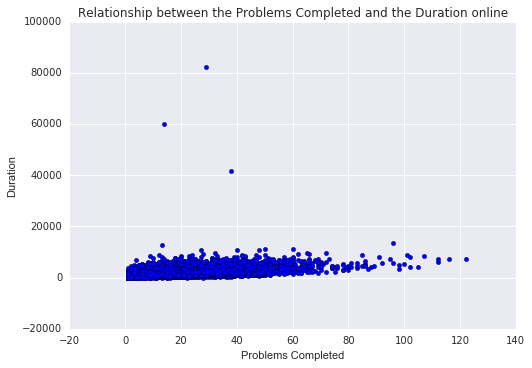

In [54]:
plt.scatter(logins['problems_completed'], logins['duration'])
plt.xlabel("Problems Completed")
plt.ylabel("Duration")
plt.title("Relationship between the Problems Completed and the Duration online")

Stats Models

In [55]:
import statsmodels.formula.api as smf

# create a fitted model in one line
lm2 = smf.ols(formula='duration ~ X', data=logins).fit()

# print the coefficients
print('Parameters: ', lm2.params)
print('Standard errors: ', lm2.bse)
print('Predicted values: ', lm2.predict())

Parameters:  Intercept     162.336803
X[0]           59.239153
X[1]            0.386350
X[2]           -0.109340
X[3]          214.126676
X[4]          220.394979
X[5]         -505.590937
X[6]           48.527007
X[7]          184.879078
X[8]           22.378639
X[9]           24.549466
X[10]          14.907647
X[11]          13.643840
X[12]          28.383275
X[13]          35.877313
X[14]          22.596624
X[15]          28.916510
X[16]         -19.844483
X[17]          10.513597
X[18]           3.649675
X[19]          55.650727
X[20]          -7.080311
X[21]          33.571766
X[22]         -23.503275
X[23]         -13.061879
X[24]         -15.970698
X[25]           7.434435
X[26]          22.445097
X[27]          15.692845
X[28]         -15.018911
X[29]          -6.794224
X[30]          -5.679287
X[31]          28.342051
X[32]           4.939698
X[33]          14.306974
X[34]          62.713603
X[35]          11.723694
X[36]          28.352151
X[37]           2.818355
X[38]       

In [56]:
lm2.summary()
#Not exactly sure what this tells me... I know that the P values need to be low for the coefficients to have an impact
#on duration

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     418.6
Date:                Fri, 17 Jun 2016   Prob (F-statistic):               0.00
Time:                        17:23:56   Log-Likelihood:            -3.9759e+05
No. Observations:               48758   AIC:                         7.954e+05
Df Residuals:                   48654   BIC:                         7.963e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    162.3368     37.039      4.383      0.000        89.741   234.933
X[0]          59.2392      0.402    147.457      0.000        58.452    60.027
X[1]           0.3864      0.034     11.421      0.000         0.320     0.453
X[2]          -0.1093      0.028     -3.874      0.000        -0.165    -0.054
X[3]         214.1267     10.447     20.496      0.000       193.650   234.604
X[4]         220.3950     13.295     16.577      0.000       194.336   246.454
X[5]        -505.5909     13.076    -38.666      0.000      -531.219  -479.962
X[6]          48.5270     11.625      4.174      0.000        25.741    71.313
X[7]         184.8791      9.880     18.713      0.000       165.515   204.243
X[8]          22.3786     10.784      2.075      0.038         1.243    43.515
X[9]          24.5495     10.751      2.283      0.022         3.476    45.623
X[10]         14.9076     10.762      1.385      0.166        -6.186    36.002
X[11]         13.6438     10.765      1.267      0.205        -7.456    34.744
X[12]         28.3833     10.801      2.628      0.009         7.214    49.553
X[13]         35.8773     10.780      3.328      0.001        14.748    57.006
X[14]         22.5966     10.831      2.086      0.037         1.368    43.825
X[15]         28.9165     20.455      1.414      0.157       -11.175    69.008
X[16]        -19.8445     21.043     -0.943      0.346       -61.090    21.401
X[17]         10.5136     20.860      0.504      0.614       -30.372    51.399
X[18]          3.6497     20.692      0.176      0.860       -36.906    44.205
X[19]         55.6507     20.899      2.663      0.008        14.689    96.613
X[20]         -7.0803     21.895     -0.323      0.746       -49.994    35.833
X[21]         33.5718     20.423      1.644      0.100        -6.458    73.602
X[22]        -23.5033     21.083     -1.115      0.265       -64.826    17.820
X[23]        -13.0619     20.577     -0.635      0.526       -53.393    27.269
X[24]        -15.9707     21.129     -0.756      0.450       -57.385    25.443
X[25]          7.4344     20.747      0.358      0.720       -33.230    48.099
X[26]         22.4451     20.580      1.091      0.275       -17.893    62.783
X[27]         15.6928     20.865      0.752      0.452       -25.203    56.589
X[28]        -15.0189     20.943     -0.717      0.473       -56.068    26.030
X[29]         -6.7942     20.751     -0.327      0.743       -47.467    33.878
X[30]         -5.6793     20.681     -0.275      0.784       -46.215    34.856
X[31]         28.3421     20.298      1.396      0.163       -11.443    68.127
X[32]          4.9397     20.566      0.240      0.810       -35.371    45.250
X[33]         14.3070     21.203      0.675      0.500       -27.251    55.865
X[34]         62.7136     20.982      2.989      0.003        21.588   103.839
X[

In [57]:
print(X.shape, y.shape)

(48758, 112) (48758,)


In [58]:
lm2.predict(y)

array([ 1837.80064234,   994.94934959,  2566.52695461, ...,  2393.6401588 ,
        1167.77452276,  1453.84341423])

In [59]:
np.mean(lm2.predict(y))
#Therefore, the average predicted duration would be 1399...?

1399.6816932606287

Nearest Neighbors

N_Neighbors=1

In [77]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=1, metric='euclidean')
knn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [78]:
from sklearn import metrics

y_pred = knn.predict(X)
metrics.accuracy_score(y, y_pred)
#Makes sense to get 1.0 because we are predicting against the duration that we already know
#Is there anything else I can do with Nearest Neighbors?

1.0

In [79]:
from sklearn.cross_validation import cross_val_score

cross_val_score(knn, X, y)

array([-0.01306738,  0.06868793,  0.07945307])

In [80]:
cross_val_score(knn, X, y, cv=10)

array([-0.00810985, -0.20106618,  0.18362618,  0.07620195,  0.09191949,
        0.12219206,  0.04320457,  0.11317133, -0.43628881,  0.10061844])

How can I improve this accuracy score and the one below?

In [81]:
# Cross-validation

from sklearn.cross_validation import LeaveOneOut, cross_val_score

loo = LeaveOneOut(len(y))
#This part isn't working****
#c_score = cross_val_score(knn, X, y, cv=loo)

#print(c_score)
#print((sum(c_score))/len(c_score))

In [82]:
from sklearn.cross_validation import KFold

loo = KFold(n=len(X), n_folds=10);
cross_val_score(knn, X, y, cv=loo)

array([-0.00810985, -0.20106618,  0.18362618,  0.07620195,  0.09191949,
        0.12219206,  0.04320457,  0.11317133, -0.43628881,  0.10061844])

Mean Squared Error

In [83]:
import math
y_pred2 = lm2.predict(X)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred2)    #predicted y's - true y's, squared.
print(math.sqrt(mse))

841.7438497547436


This is the average error of the duration. How can I improve this?

N_Neighbors=2

In [84]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=2, metric='euclidean')
knn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [85]:
from sklearn import metrics

y_pred = knn.predict(X)
metrics.accuracy_score(y, y_pred)
#Makes sense to get 1.0 because we are predicting against the duration that we already know
#Is there anything else I can do with Nearest Neighbors?

0.043808195578161534

In [86]:
from sklearn.cross_validation import cross_val_score

cross_val_score(knn, X, y)

array([ 0.08400748,  0.21390653,  0.22187054])

In [91]:
cross_val_score(knn, X, y, cv=10)

array([ 0.25460176,  0.23255828,  0.37328676,  0.29292676,  0.26030076,
        0.33641544,  0.2801749 ,  0.17309727,  0.21705308,  0.23010292])

How can I improve this accuracy score?

In [88]:
# Cross-validation

from sklearn.cross_validation import LeaveOneOut, cross_val_score

loo = LeaveOneOut(len(y))
#This part isn't working****
#c_score = cross_val_score(knn, X, y, cv=loo)

#print(c_score)
#print((sum(c_score))/len(c_score))

In [89]:
from sklearn.cross_validation import KFold

loo = KFold(n=len(X), n_folds=10);
cross_val_score(knn, X, y, cv=loo)

array([ 0.25460176,  0.23255828,  0.37328676,  0.29292676,  0.26030076,
        0.33641544,  0.2801749 ,  0.17309727,  0.21705308,  0.23010292])

Mean Squared Error

In [90]:
import math
y_pred2 = lm2.predict(X)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred2)    #predicted y's - true y's, squared.
print(math.sqrt(mse))

841.7438497547436


This is the average error of the duration. How can I improve this? Why is it the same as one neighbor?

This mean squared error represents the average error of my duration time (y values).

In [67]:
pd.DataFrame({'y': y,'y_pred': y_pred2, 'error': np.abs(y - y_pred2)})

,error,y,y_pred
0,217.800642,1620,1837.800642
1,625.050650,1620,994.949350
2,946.526955,1620,2566.526955
3,603.097514,420,1023.097514
4,375.753592,2640,3015.753592
5,751.494159,2700,1948.505841
6,292.856593,1500,1792.856593
7,443.251292,420,-23.251292
8,189.851697,2400,2210.148303
9,774.092733,420,1194.092733


In [68]:
#What can I do with this error?

Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X, y)
rfr.score(X,y)

0.89591695479561362

In [70]:
y_pred3 = rfr.predict(X)

print(rfr.score(X,y))
print(mean_squared_error(y, y_pred3))
#something is wrong with mse

0.895916954796
139102.102465


In [71]:
from sklearn.cross_validation import cross_val_score
#Random Forest
print(cross_val_score(rfr, X, y, cv = 3, scoring='mean_squared_error'))
np.mean(cross_val_score(rfr, X, y, cv = 3, scoring='mean_squared_error'))
#Not too sure what these mean

[ -574342.32104842 -1211689.11634775 -1146549.67487079]


-841139.24470818834

In [72]:
#Linear Regression
print(cross_val_score(lm, X, y, cv = 3, scoring='mean_squared_error'))
np.mean(cross_val_score(lm, X, y, cv = 3, scoring='mean_squared_error'))
#Not too sure what these mean

[ -443230.80629404  -592576.40067486 -1123150.9901512 ]


-719652.73237336474

Adaboost

In [73]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
regr = ada.fit(X, y)

In [74]:
predreg = regr.predict(X)

In [75]:
print(predreg)
np.mean(predreg)
#Not sure why this is much lower? Did it adjust the weights according to the error?

[ 2676.55700393  2257.10743802  3020.80793243 ...,  2467.60265006
  2131.15096001  1489.08625952]


2238.6300241442991

In [76]:
print(predreg.score(X, y))

AttributeError: 'numpy.ndarray' object has no attribute 'score'

Why doesn't this work above?

What does RandomForest and Adaboost tell me?